In [1]:
#basic and viz libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE

#Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

#Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Cross-Validation
from sklearn.model_selection import cross_val_score

#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

c:\Users\Robin\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
credit_df = pd.read_csv("credit-df-dataset-cleaned.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,1,20000,1,24,3,3,0,0,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0
1,2,120000,1,26,0,3,1,1,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0
2,3,90000,1,34,1,1,1,1,1,1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0
3,4,50000,1,37,1,1,1,1,1,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0
4,5,50000,0,57,0,1,0,1,1,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0


In [ ]:
#independent and dependent columns

Y = credit_df[:]['DEFAULT']
X = credit_df.drop(['DEFAULT','ID'], axis=1)

In [ ]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (24000, 26)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6000, 26)
Number transactions y_test dataset:  (6000,)


In [ ]:
#SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 5339
Before OverSampling, counts of label '0': 18661 

After OverSampling, the shape of train_X: (37322, 26)
After OverSampling, the shape of train_y: (37322,) 

After OverSampling, counts of label '1': 18661
After OverSampling, counts of label '0': 18661


In [ ]:
X_train_res.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,20000,1,44,1,1,3,1,1,-1,17095,19112,17980,18780,0,0,3000,0,1000,1000,0,0,0,0,1,0,0
1,260000,1,30,0,0,0,0,0,0,165,165,274,165,333,165,165,274,165,333,165,293,0,1,0,1,0
2,20000,0,39,3,1,1,1,1,1,20264,20328,19299,19928,20204,20398,1500,1500,900,700,1480,0,0,1,0,0,0
3,30000,0,23,3,3,3,3,3,3,28224,29276,28635,30127,30525,29793,1800,150,2250,1000,0,700,0,1,0,0,0
4,10000,0,29,1,1,1,1,1,1,8275,8409,8600,9470,6690,9690,2800,2000,1500,900,3000,0,0,1,0,0,0


In [ ]:
#After SMOTE

print("Number transactions X_train dataset: ", X_train_res.shape)
print("Number transactions y_train dataset: ", y_train_res.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (37322, 26)
Number transactions y_train dataset:  (37322,)
Number transactions X_test dataset:  (6000, 26)
Number transactions y_test dataset:  (6000,)


# Models

In [ ]:
#initializing models

lr=LogisticRegression()
knc = KNeighborsClassifier() 
svc = SVC()
xgb = XGBClassifier()

#to store results
models = ['Logistic Regression', "KNN", "SVM", "XGBoost"]
recall = []
accuracy = []
precision = []
f1 = []

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Logistic Regression

In [ ]:
#logistic regression
lr = lr.fit(X_train_res, y_train_res) 
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


accuracy_lrc = round(accuracy_score(y_test,y_pred),3)
recall_lr = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_lrc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_lr = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy.append(accuracy_lrc)
recall.append(recall_lr)
precision.append(precision_lrc)
f1.append(f1_score_lr)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      4703
           1       0.31      0.49      0.38      1297

    accuracy                           0.65      6000
   macro avg       0.57      0.59      0.57      6000
weighted avg       0.72      0.65      0.68      6000



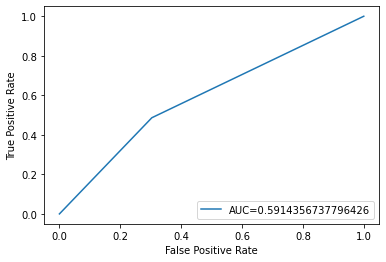

In [ ]:
#plotting ROC curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Log Transformation

It is possible that some numerical variables could be skewed in nature. Log Transformation is one of the technique that can help in removing the skewness from data by making the data Normally Distributed.

Numerical Variables: 'LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6' could be skewed in the nature.

In [ ]:
X_train_log = X_train_res.copy()
X_train_log.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,20000,1,44,1,1,3,1,1,-1,17095,19112,17980,18780,0,0,3000,0,1000,1000,0,0,0,0,1,0,0
1,260000,1,30,0,0,0,0,0,0,165,165,274,165,333,165,165,274,165,333,165,293,0,1,0,1,0
2,20000,0,39,3,1,1,1,1,1,20264,20328,19299,19928,20204,20398,1500,1500,900,700,1480,0,0,1,0,0,0
3,30000,0,23,3,3,3,3,3,3,28224,29276,28635,30127,30525,29793,1800,150,2250,1000,0,700,0,1,0,0,0
4,10000,0,29,1,1,1,1,1,1,8275,8409,8600,9470,6690,9690,2800,2000,1500,900,3000,0,0,1,0,0,0


<AxesSubplot:xlabel='PAY_AMT6', ylabel='Density'>

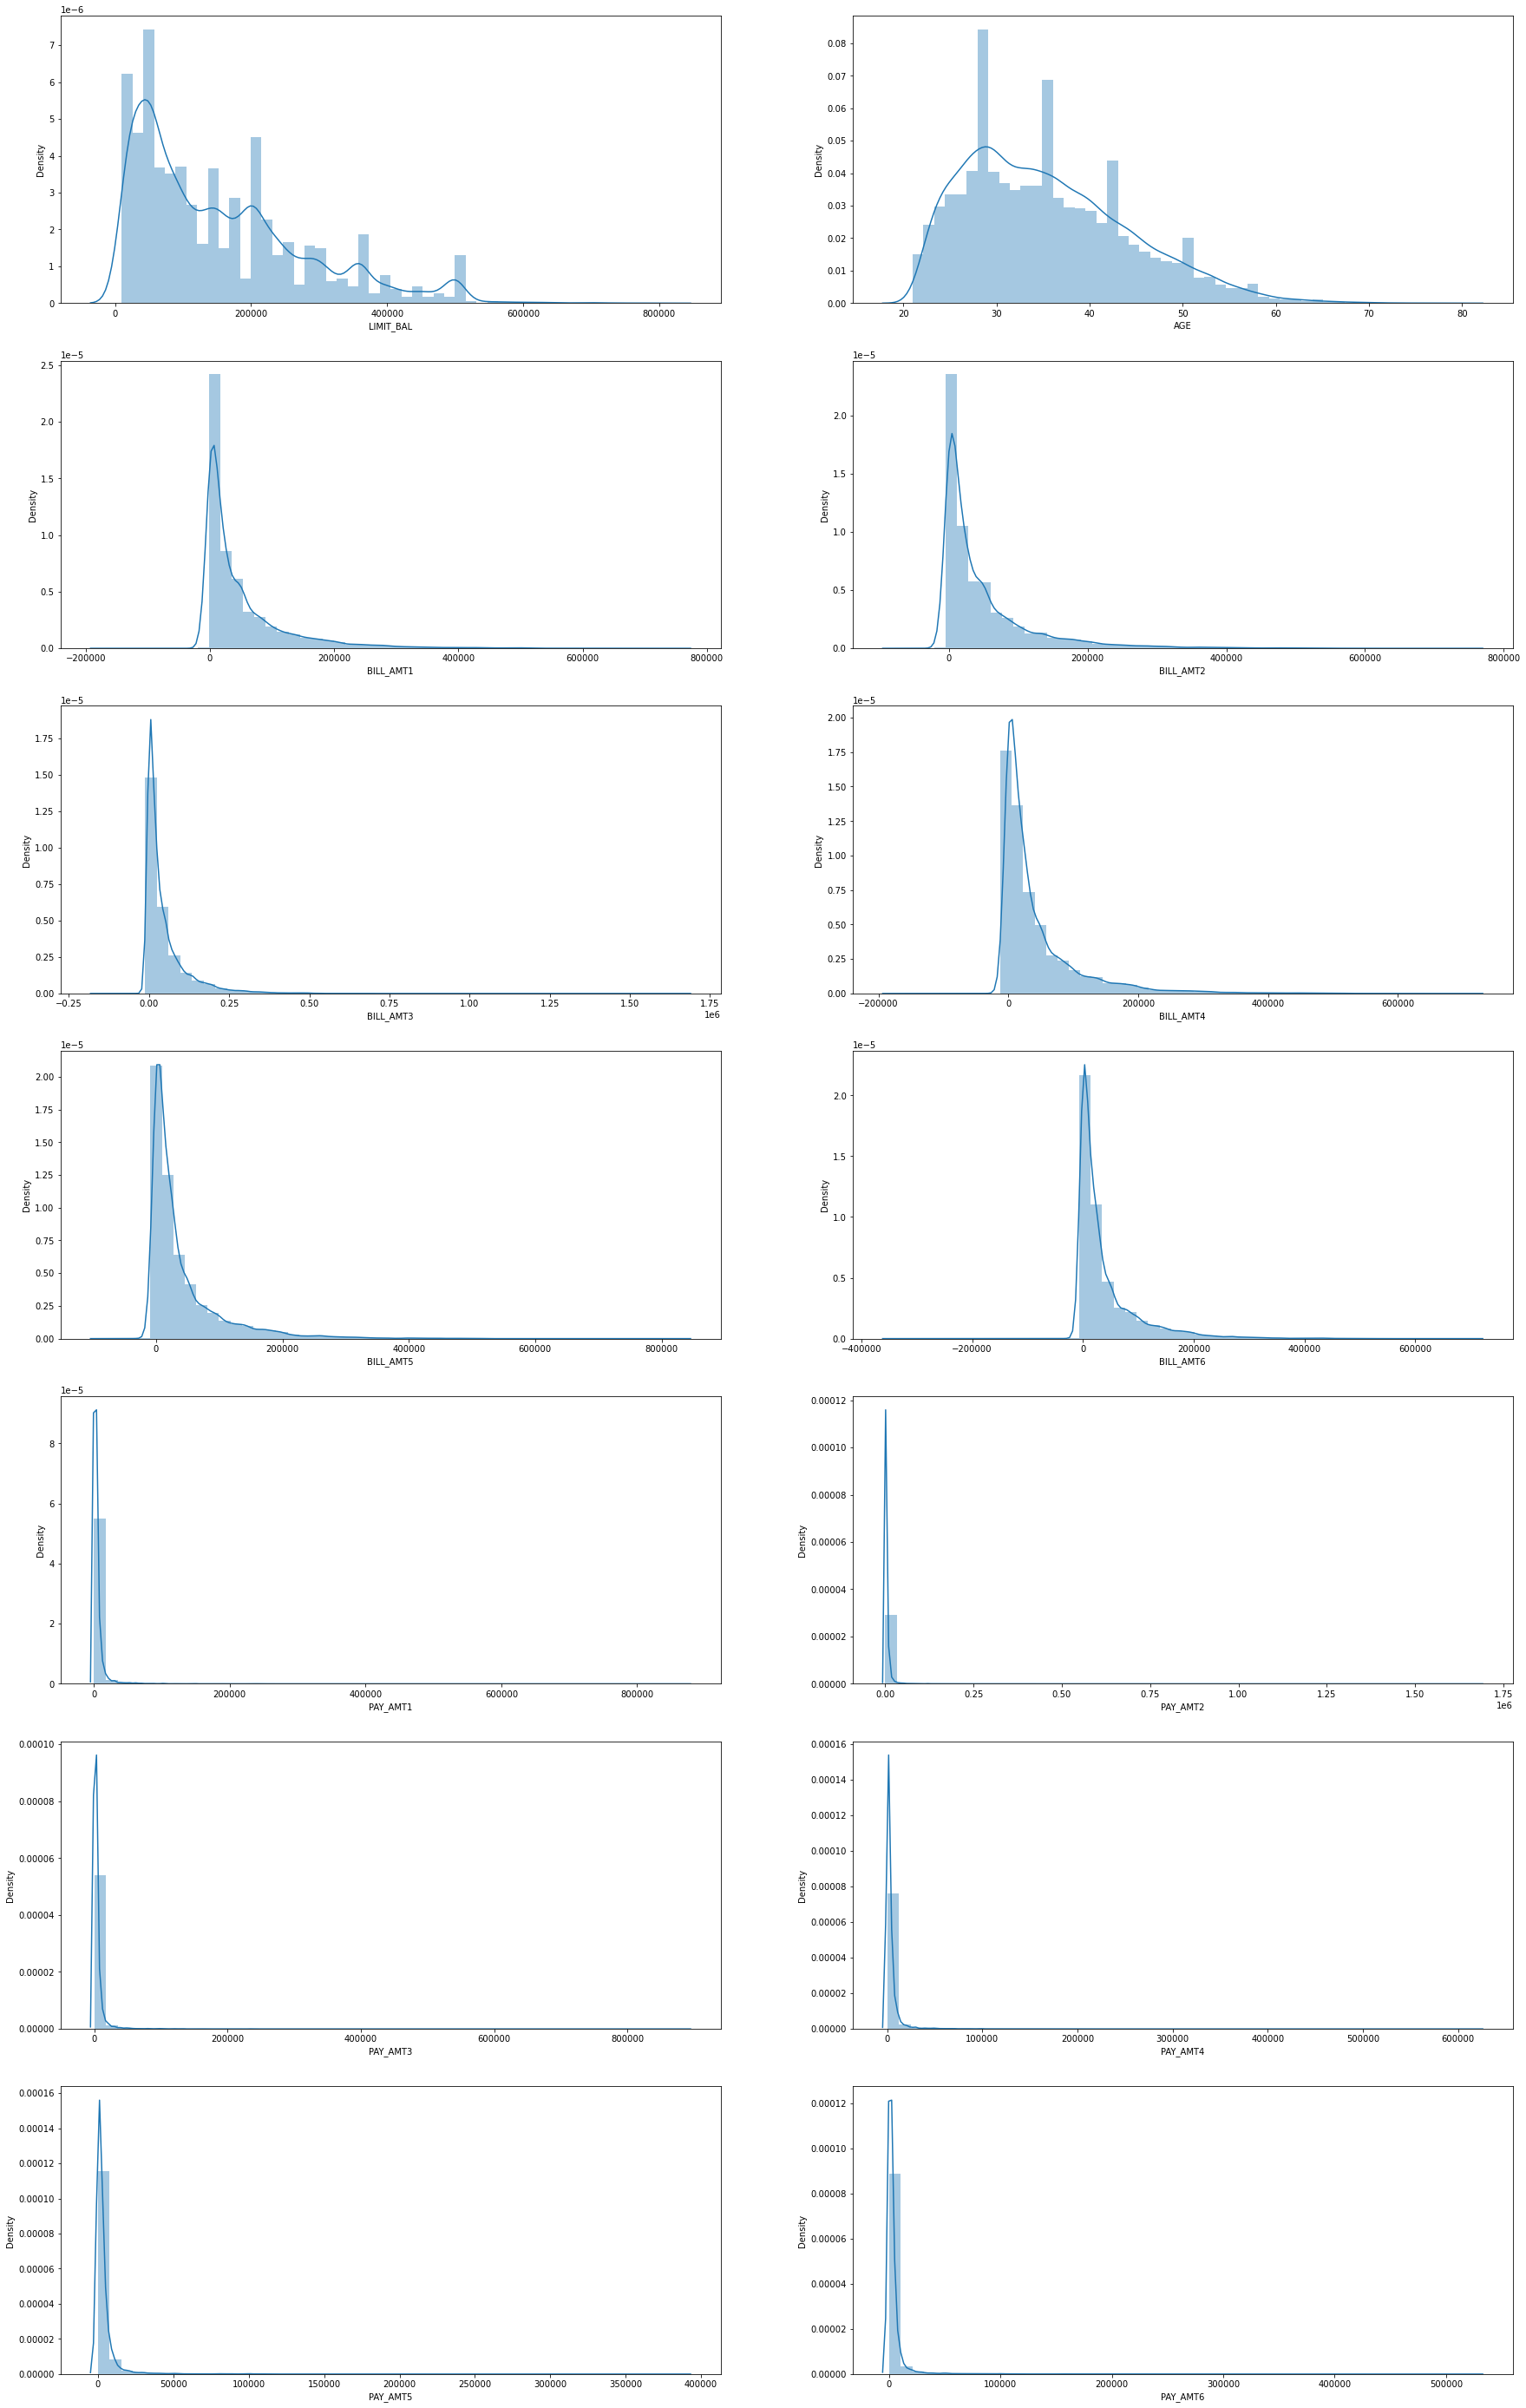

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(30,50))
sns.distplot(X_train_log['LIMIT_BAL'],ax=axes[0,0])
sns.distplot(X_train_log['AGE'],ax=axes[0,1])
sns.distplot(X_train_log['BILL_AMT1'],ax=axes[1,0])
sns.distplot(X_train_log['BILL_AMT2'],ax=axes[1,1])
sns.distplot(X_train_log['BILL_AMT3'],ax=axes[2,0])
sns.distplot(X_train_log['BILL_AMT4'],ax=axes[2,1])
sns.distplot(X_train_log['BILL_AMT5'],ax=axes[3,0])
sns.distplot(X_train_log['BILL_AMT6'],ax=axes[3,1])
sns.distplot(X_train_log['PAY_AMT1'],ax=axes[4,0])
sns.distplot(X_train_log['PAY_AMT2'],ax=axes[4,1])
sns.distplot(X_train_log['PAY_AMT3'],ax=axes[5,0])
sns.distplot(X_train_log['PAY_AMT4'],ax=axes[5,1])
sns.distplot(X_train_log['PAY_AMT5'],ax=axes[6,0])
sns.distplot(X_train_log['PAY_AMT6'],ax=axes[6,1])

There is not much skewness in Pay columns so as of now will be focussin on ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6''PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'] columns only.

Log Transformation of negative values and 0 is undefined so first will be converting all negative values to positive by adding a same constant in all the values.

In [ ]:
constant = 400000
col = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
      'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for columns in col:
    X_train_log[columns] = X_train_log[columns]+constant
    X_train_log[columns] = np.log10(X_train_log[columns])

In [ ]:
X_train_log.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,5.623249,1,5.602108,1,1,3,1,1,-1,5.620235,5.622330,5.621156,5.621986,5.602060,5.602060,5.605305,5.602060,5.603144,5.603144,5.602060,5.602060,0,0,1,0,0
1,5.819544,1,5.602093,0,0,0,0,0,0,5.602239,5.602239,5.602357,5.602239,5.602421,5.602239,5.602239,5.602357,5.602239,5.602421,5.602239,5.602378,0,1,0,1,0
2,5.623249,0,5.602102,3,1,1,1,1,1,5.623522,5.623588,5.622524,5.623175,5.623460,5.623661,5.603686,5.603686,5.603036,5.602819,5.603664,5.602060,0,1,0,0,0
3,5.633468,0,5.602085,3,3,3,3,3,3,5.631671,5.632737,5.632088,5.633597,5.633998,5.633259,5.604010,5.602223,5.604496,5.603144,5.602060,5.602819,0,1,0,0,0
4,5.612784,0,5.602091,1,1,1,1,1,1,5.610953,5.611095,5.611298,5.612222,5.609263,5.612455,5.605089,5.604226,5.603686,5.603036,5.605305,5.602060,0,1,0,0,0


In [ ]:
#logistic regression after log transformation

lr = lr.fit(X_train_log, y_train_res) 
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.25      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.52      0.50      0.44      6000
weighted avg       0.67      0.78      0.69      6000



Transforming into log is giving recall value for label 1 as 0.00, which means it is predicting all the classes as 0. It is performing poorly so will be avoiding log transformation in further steps.

# KNN

In [ ]:
#KNN
knc = knc.fit(X_train_res, y_train_res) 
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_knc = round(accuracy_score(y_test,y_pred),3)
recall_knc = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_knc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_knc = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy.append(accuracy_knc)
recall.append(recall_knc)
precision.append(precision_knc)
f1.append(f1_score_knc)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71      4703
           1       0.28      0.54      0.37      1297

    accuracy                           0.60      6000
   macro avg       0.56      0.58      0.54      6000
weighted avg       0.71      0.60      0.64      6000



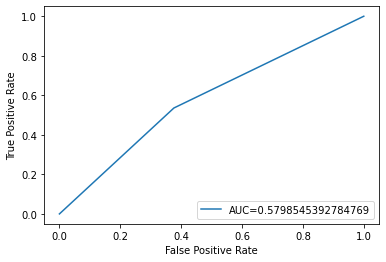

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVM

In [ ]:
svc = svc.fit(X_train_res, y_train_res) 
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_svc = round(accuracy_score(y_test,y_pred),3)
recall_svc = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_svc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_svc = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy.append(accuracy_svc)
recall.append(recall_svc)
precision.append(precision_svc)
f1.append(f1_score_svc)

              precision    recall  f1-score   support

           0       0.87      0.54      0.66      4703
           1       0.29      0.70      0.41      1297

    accuracy                           0.57      6000
   macro avg       0.58      0.62      0.54      6000
weighted avg       0.74      0.57      0.61      6000



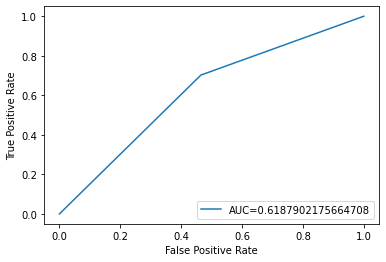

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost

In [3]:
xgb = xgb.fit(X_train_res, y_train_res) 
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_xgb = round(accuracy_score(y_test,y_pred),3)
recall_xgb = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_xgb = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_xgb = round(f1_score(y_test,y_pred, average='weighted'),3)

#saving results in the list
accuracy.append(accuracy_xgb)
recall.append(recall_xgb)
precision.append(precision_xgb)
f1.append(f1_score_xgb)

NameError: name 'xgb' is not defined

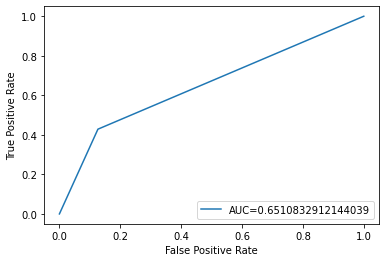

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
dataframe = pd.DataFrame(list(zip(models, accuracy, recall, precision, f1)), columns = ['Models','Accuracy','Recall', 'Precision','f1-score'])
dataframe.head()

,Models,Accuracy,Recall,Precision,f1-score
0,Logistic Regression,0.651,0.651,0.718,0.675
1,KNN,0.605,0.605,0.711,0.638
2,SVM,0.571,0.571,0.743,0.608
3,XGBoost,0.777,0.777,0.768,0.772


# GridSearchCV

In [ ]:
#defining parameters for models

logistic_parameters = {'solver':('sag', 'saga','newton-cg','liblinear','lbfgs'),"penalty":("l1","l2","None")}
knn_parameters = {'n_neighbors':(range(5,10)), "algorithm":("auto","kd_tree")}
svm_parameters = {"gamma":(1, 0.1, 0.01),"kernel":("linear","rbf")}
xgboost_parameters = {"n_estimators": (45, 50, 55)}

In [ ]:
parameter_dictionary = {}

#function to find best parameters for each model using GridSearchCV

def optimize_params(model, parameter_list):
    
    #taking only a sub-sample of training data so to reduce the timing. 
    X_sub = X_train_res[0:10000]
    y_sub = y_train_res[0:10000]
    
    grid = GridSearchCV(model, parameter_list, cv=3)
    grid.fit(X_sub, y_sub)
    parameter_dictionary[model] = grid.best_params_

In [ ]:
#call the function optimize_params to get best parameters for the model by using GridSearchCV. Note: SVM and XGB can take a lot of time even after giving just one parameter. In the below models, I have used the best paarmeter to train the model. 

# optimize_params(lr, logistic_parameters)
# optimize_params(knc, knn_parameters)
# optimize_params(svc, svm_parameters)
# optimize_params(xgb, xgboost_parameters)

In [ ]:
#parameter_dictionary

In [ ]:
#defining models with best parameters

lr=LogisticRegression(solver='liblinear', penalty='l1')
knc = KNeighborsClassifier(n_neighbors = 6, algorithm='kd_tree') 
svc = SVC(kernel="rbf", gamma=1)
xgb = XGBClassifier(n_estimators = 50)

In [ ]:
#to store results

recall_best_params = []
accuracy_best_params = []
precision_best_params = []
f1_best_params = []

# Logistic Regression

In [ ]:
#logistic regression
lr = lr.fit(X_train_res, y_train_res) 
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


accuracy_lrc = round(accuracy_score(y_test,y_pred),3)
recall_lr = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_lrc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_lr = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy_best_params.append(accuracy_lrc)
recall_best_params.append(recall_lr)
precision_best_params.append(precision_lrc)
f1_best_params.append(f1_score_lr)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4703
           1       0.44      0.42      0.43      1297

    accuracy                           0.76      6000
   macro avg       0.64      0.63      0.64      6000
weighted avg       0.75      0.76      0.76      6000



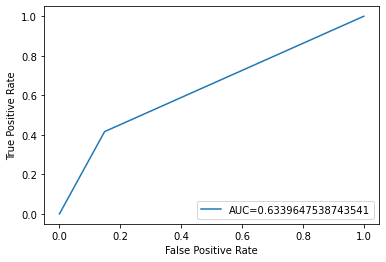

In [ ]:
#plotting ROC curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# KNN

In [ ]:
#KNN
knc = knc.fit(X_train_res, y_train_res) 
y_pred = knc.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_knc = round(accuracy_score(y_test,y_pred),3)
recall_knc = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_knc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_knc = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy_best_params.append(accuracy_knc)
recall_best_params.append(recall_knc)
precision_best_params.append(precision_knc)
f1_best_params.append(f1_score_knc)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      4703
           1       0.29      0.46      0.35      1297

    accuracy                           0.64      6000
   macro avg       0.56      0.57      0.55      6000
weighted avg       0.71      0.64      0.66      6000



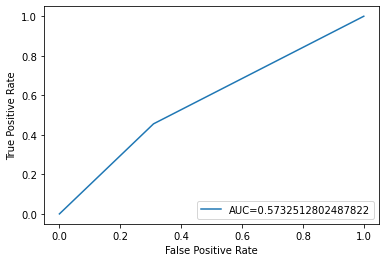

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVM

In [ ]:
svc = svc.fit(X_train_res, y_train_res) 
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_svc = round(accuracy_score(y_test,y_pred),3)
recall_svc = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_svc = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_svc = round(f1_score(y_test,y_pred, average='weighted'),3)


#saving results in the list
accuracy_best_params.append(accuracy_svc)
recall_best_params.append(recall_svc)
precision_best_params.append(precision_svc)
f1_best_params.append(f1_score_svc)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4703
           1       0.47      0.02      0.04      1297

    accuracy                           0.78      6000
   macro avg       0.63      0.51      0.46      6000
weighted avg       0.72      0.78      0.70      6000



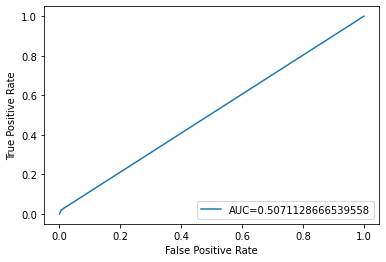

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost

In [ ]:
xgb = xgb.fit(X_train_res, y_train_res) 
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_xgb = round(accuracy_score(y_test,y_pred),3)
recall_xgb = round(recall_score(y_test,y_pred, average='weighted'),3)
precision_xgb = round(precision_score(y_test,y_pred, average='weighted'),3)
f1_score_xgb = round(f1_score(y_test,y_pred, average='weighted'),3)

#saving results in the list
accuracy_best_params.append(accuracy_xgb)
recall_best_params.append(recall_xgb)
precision_best_params.append(precision_xgb)
f1_best_params.append(f1_score_xgb)


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4703
           1       0.49      0.45      0.47      1297

    accuracy                           0.78      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.78      0.78      6000



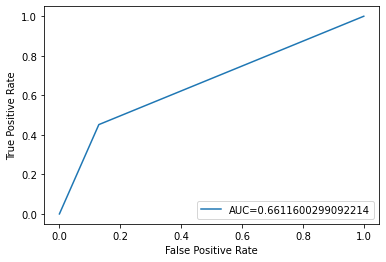

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
dataframe_best_params = pd.DataFrame(list(zip(models, accuracy_best_params, recall_best_params, precision_best_params, f1_best_params)), columns = ['Models','Accuracy','Recall', 'Precision','f1-score'])
dataframe_best_params.head()

,Models,Accuracy,Recall,Precision,f1-score
0,Logistic Regression,0.758,0.758,0.754,0.755
1,KNN,0.640,0.640,0.706,0.665
2,SVM,0.783,0.783,0.717,0.697
3,XGBoost,0.780,0.780,0.774,0.777


In [ ]:
dataframe.head()

,Models,Accuracy,Recall,Precision,f1-score
0,Logistic Regression,0.651,0.651,0.718,0.675
1,KNN,0.605,0.605,0.711,0.638
2,SVM,0.571,0.571,0.743,0.608
3,XGBoost,0.777,0.777,0.768,0.772


It can be seen that using best parameters improved all the scores.

In [ ]:
#saving dataframe in a csv file to avoid running models again and again

dataframe.to_csv('Model_Scores_best_params.csv', index=False)

# Dimensionallity Reduction - PCA

In [ ]:
#standard scalar

X_train_sc = pd.DataFrame(sc.fit_transform(X_train_res),columns = X_train_res.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

#performing PCA

pca = PCA(n_components = 0.9)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

print(f'Original: {X_train_res.shape}')
print(f'PCA Transformed: {X_train_pca.shape}')

Original: (37322, 26)
PCA Transformed: (37322, 15)


In [ ]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.196002,-1.088930,-2.101959,1.178225,-0.551625,1.961024,-0.746287,-0.812112,0.176837,0.050608,0.099674,-0.029380,-0.213249,0.747215,-0.117301
1,-2.400473,0.853851,0.660715,-1.491268,0.989811,0.642099,0.207690,-0.392462,0.266411,0.056423,-0.018827,-0.087463,0.001090,-0.702052,0.717397
2,-0.509592,-1.628711,-0.928496,-0.500663,0.981187,-1.050940,-0.292968,0.527187,-0.160746,-0.048650,0.049174,0.063011,0.137533,0.836358,0.067452
3,1.405726,-4.325725,0.584983,-0.096603,0.967941,-0.896177,-0.034216,0.370994,-0.111266,-0.010153,-0.078502,-0.039570,0.039830,0.159046,-0.935368
4,-1.166613,-1.331269,-0.214120,-0.636438,1.221545,-0.733641,-0.368034,0.678383,-0.230584,-0.077418,0.153918,0.095465,-0.077673,-0.052270,-1.019539


In [ ]:
recall_pca = []
accuracy_pca = []
precision_pca = []
f1_pca = []

# Logistic Regression

In [ ]:
#logistic regression
lr_pca = lr.fit(X_train_pca, y_train_res) 
y_pred_pca = lr_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


accuracy_lrc_pca = round(accuracy_score(y_test,y_pred_pca),3)
recall_lr_pca = round(recall_score(y_test,y_pred_pca, average='weighted'),3)
precision_lrc_pca = round(precision_score(y_test,y_pred_pca, average='weighted'),3)
f1_score_lr_pca = round(f1_score(y_test,y_pred_pca, average='weighted'),3)


#saving results in the list
accuracy_pca.append(accuracy_lrc_pca)
recall_pca.append(recall_lr_pca)
precision_pca.append(precision_lrc_pca)
f1_pca.append(f1_score_lr_pca)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      4703
           1       0.34      0.54      0.41      1297

    accuracy                           0.67      6000
   macro avg       0.59      0.62      0.59      6000
weighted avg       0.74      0.67      0.69      6000



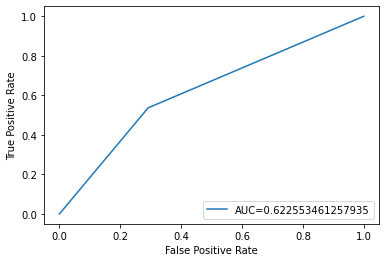

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# KNN

In [ ]:
#KNN
knc_pca = knc.fit(X_train_pca, y_train_res) 
y_pred_pca = knc_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


accuracy_knc_pca = round(accuracy_score(y_test,y_pred_pca),3)
recall_knc_pca = round(recall_score(y_test,y_pred_pca, average='weighted'),3)
precision_knc_pca = round(precision_score(y_test,y_pred_pca, average='weighted'),3)
f1_score_knc_pca = round(f1_score(y_test,y_pred_pca, average='weighted'),3)


#saving results in the list
accuracy_pca.append(accuracy_knc_pca)
recall_pca.append(recall_knc_pca)
precision_pca.append(precision_knc_pca)
f1_pca.append(f1_score_knc_pca)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4703
           1       0.40      0.41      0.40      1297

    accuracy                           0.74      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.74      0.74      6000



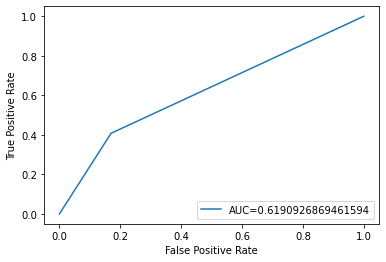

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# SVM

In [ ]:
svc_pca = svc.fit(X_train_pca, y_train_res) 
y_pred_pca = svc_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


accuracy_svc_pca = round(accuracy_score(y_test,y_pred_pca),3)
recall_svc_pca = round(recall_score(y_test,y_pred_pca, average='weighted'),3)
precision_svc_pca = round(precision_score(y_test,y_pred_pca, average='weighted'),3)
f1_score_svc_pca = round(f1_score(y_test,y_pred_pca, average='weighted'),3)


#saving results in the list
accuracy_pca.append(accuracy_svc_pca)
recall_pca.append(recall_svc_pca)
precision_pca.append(precision_svc_pca)
f1_pca.append(f1_score_svc_pca)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4703
           1       0.44      0.41      0.43      1297

    accuracy                           0.76      6000
   macro avg       0.64      0.63      0.64      6000
weighted avg       0.75      0.76      0.76      6000



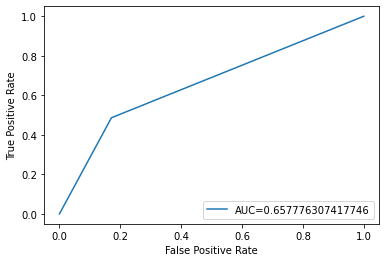

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# XGBoost

In [4]:
xgb_pca = xgb.fit(X_train_pca, y_train_res) 
y_pred_pca = xgb_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


accuracy_xgb_pca = round(accuracy_score(y_test,y_pred_pca),3)
recall_xgb_pca = round(recall_score(y_test,y_pred_pca, average='weighted'),3)
precision_xgb_pca = round(precision_score(y_test,y_pred_pca, average='weighted'),3)
f1_score_xgb_pca = round(f1_score(y_test,y_pred_pca, average='weighted'),3)


#saving results in the list
accuracy_pca.append(accuracy_xgb_pca)
recall_pca.append(recall_xgb_pca)
precision_pca.append(precision_xgb_pca)
f1_pca.append(f1_score_xgb_pca)

NameError: name 'xgb' is not defined

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(y_pred_pca, X_test, y_test)

NameError: name 'y_pred_pca' is not defined

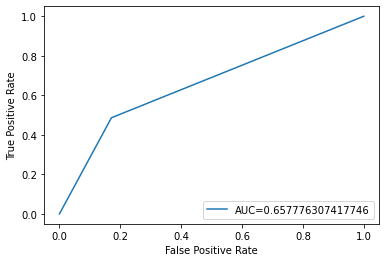

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
dataframe_pca = pd.DataFrame(list(zip(models, accuracy_pca, recall_pca, precision_pca, f1_pca)), columns = ['Models','Accuracy','Recall', 'Precision','f1-score'])

In [ ]:
#comparing the two dataframes

#Without PCA
dataframe_best_params

,Models,Accuracy,Recall,Precision,f1-score
0,Logistic Regression,0.758,0.758,0.754,0.755
1,KNN,0.640,0.640,0.706,0.665
2,SVM,0.783,0.783,0.717,0.697
3,XGBoost,0.780,0.780,0.774,0.777


In [ ]:
#With PCA

dataframe_pca

,Models,Accuracy,Recall,Precision,f1-score
0,Logistic Regression,0.671,0.671,0.737,0.694
1,KNN,0.739,0.739,0.741,0.740
2,SVM,0.760,0.760,0.754,0.757
3,XGBoost,0.755,0.755,0.765,0.759


Reducing the number of dimensions, improved the scores for KNN Model but decreased the scores for Logistic, SVM and XGBoost.

XGBoost without reducing dimensions is giving better results as compared to other models, with an accuracy and recall score of around 80%.

In [ ]:
#saving dataframe in a csv file to avoid running models again and again

dataframe.to_csv('Model_Scores_pca.csv', index=False)

# Cross Validation

In [ ]:
#XGBoost
xgb_accuracy_scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, scoring='accuracy')

print("After applying 5-fold cross validation, the different accuracy scores obtained are------")
print("\n")

print("XGBoost: ",list(xgb_accuracy_scores))
print("\n")

print("Average XGBoost Score", np.mean(xgb_accuracy_scores))

After applying 5-fold cross validation, the different accuracy scores obtained are------


XGBoost:  [0.6278633623576692, 0.802277294038848, 0.8869239013933548, 0.8839764201500536, 0.8873258306538049]


Average XGBoost Score 0.817673361718746
